# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
warnings.filterwarnings('ignore')

In [4]:
housing_df=pd.read_csv('housing.csv')

In [5]:
#view the few rows of the data
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
housing_df.shape

(545, 13)

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [8]:
housing_df.describe()                                                    

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


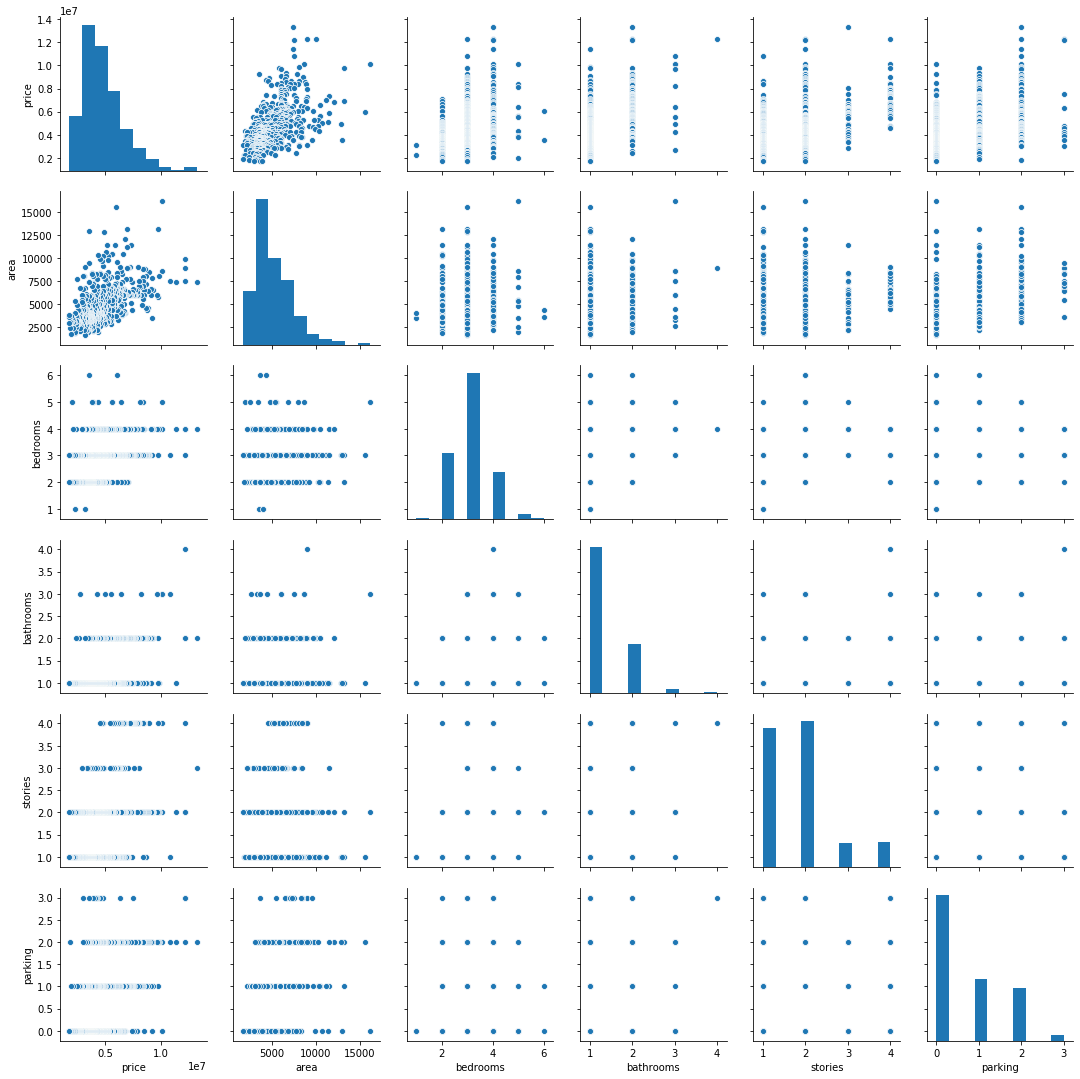

In [9]:
#Visualizing numerical variables
sns.pairplot(housing_df)

In [10]:
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

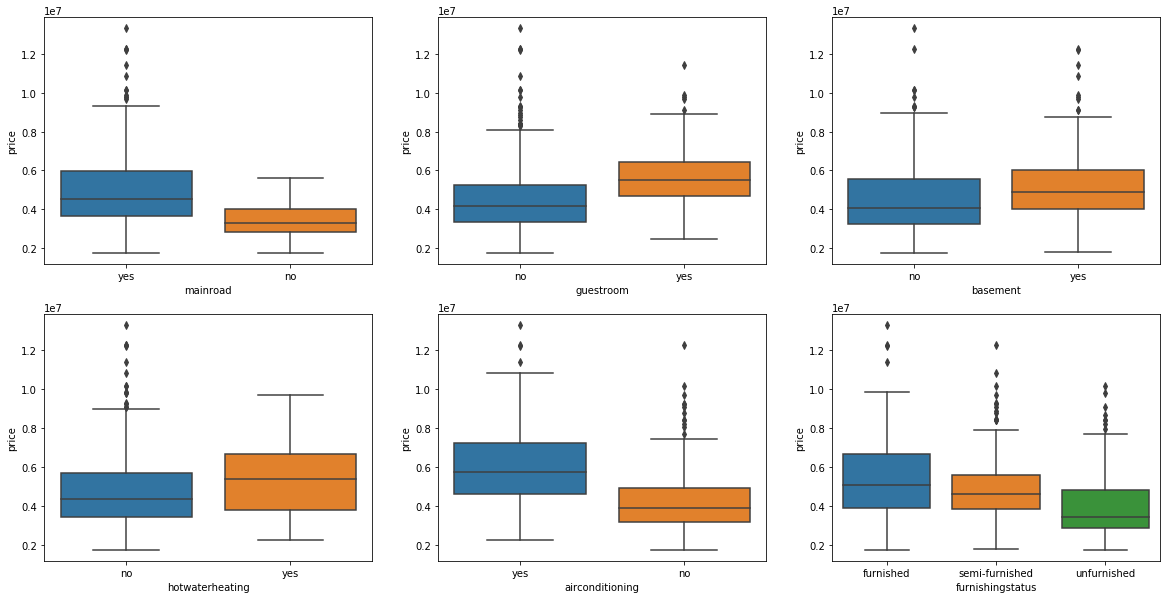

In [11]:
#visualizing categorical variable
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot('mainroad','price',data=housing_df)
plt.subplot(2,3,2)
sns.boxplot('guestroom','price',data=housing_df)
plt.subplot(2,3,3)
sns.boxplot('basement','price',data=housing_df)
plt.subplot(2,3,4)
sns.boxplot('hotwaterheating','price',data=housing_df)
plt.subplot(2,3,5)
sns.boxplot('airconditioning','price',data=housing_df)
plt.subplot(2,3,6)
sns.boxplot('furnishingstatus','price',data=housing_df)

## Data preparation

- Encoding
    - Converting binary categorical variables 1/0
    - Other categorical variables to dummy vars

In [12]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [14]:
housing_df[varlist]=housing_df[varlist].apply(lambda x: x.map({'yes':1,'no':0}))

In [15]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [16]:
dummies=pd.get_dummies(housing_df['furnishingstatus']).drop('furnished',axis=1)

In [17]:
housing=pd.concat([housing_df.drop('furnishingstatus',axis=1),dummies],sort=False,axis=1)

In [18]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_df,test_df=train_test_split(housing,test_size=0.3,random_state=100)

In [21]:
print(train_df.shape)
print(test_df.shape)

(381, 14)
(164, 14)


## Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()

In [24]:
num_var=['area','bedrooms','bathrooms','stories','parking','price']

In [25]:
pd.options.mode.chained_assignment=None

In [26]:
train_df[num_var]=scaler.fit_transform(train_df[num_var])

In [27]:
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


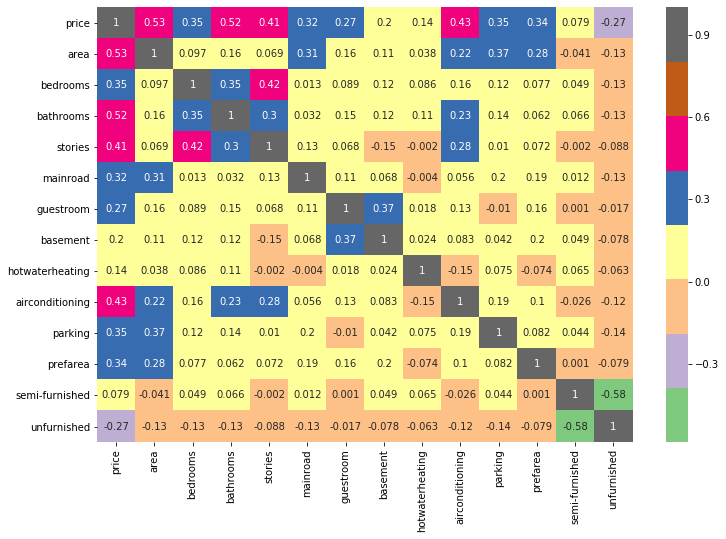

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr().round(3),annot=True,cmap="Accent")

In [29]:
y_train=train_df.pop('price')
X_train=train_df

In [30]:
print(X_train.shape)
print(y_train.shape)

(381, 13)
(381,)


In [31]:
import statsmodels.api as sm

- statistical significance
- Correlation with another variables VIF 

In [32]:
#creating the model with only area as feature
X_train_sm=sm.add_constant(X_train['area'])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [33]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           3.15e-29
Time:                        21:08:36   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- model and feature is significant but R^2 is low lets add another variable

In [34]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [35]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.51e-54
Time:                        21:08:36   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','bedrooms']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           3.12e-57
Time:                        21:08:36   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','bedrooms','stories']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const        0.046694
area         0.390871
bathrooms    0.232997
bedrooms     0.089656
stories      0.127895
dtype: float64

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           5.09e-64
Time:                        21:08:36   Log-Likelihood:                 316.23
No. Observations:                 381   AIC:                            -622.5
Df Residuals:                     376   BIC:                            -602.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0467      0.017      2.710      0.007       0.013       0.081
area           0.3909      0.030     12.827      0.000       0.331       0.451
bathrooms      0.2330      0.025      9.283      0.000       0.184       0.282
bedrooms       0.0897      0.042      2.125      0.034       0.007       0.173
stories        0.1279      0.021      6.187      0.000       0.087       0.169
==============================================================================
Omnibus:                       65.663   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.324
Skew:                           0.794   Prob(JB):                     7.74e-42
Kurtosis:                       6.067   Cond. No.                         9.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [41]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','bedrooms','stories','mainroad']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     100.2
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           6.96e-67
Time:                        21:08:38   Log-Likelihood:                 325.46
No. Observations:                 381   AIC:                            -638.9
Df Residuals:                     375   BIC:                            -615.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.020     -0.100      0.920      -0.042       0.038
area           0.3490      0.031     11.145      0.000       0.287       0.411
bathrooms      0.2371      0.025      9.658      0.000       0.189       0.285
bedrooms       0.1005      0.041      2.433      0.015       0.019       0.182
stories        0.1157      0.020      5.673      0.000       0.076       0.156
mainroad       0.0693      0.016      4.315      0.000       0.038       0.101
==============================================================================
Omnibus:                       72.866   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.960
Skew:                           0.866   Prob(JB):                     1.72e-48
Kurtosis:                       6.295   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Contiue....................... Forward selection

### Backward selection
- adding all the varibles and removing ...

In [42]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           8.83e-83
Time:                        21:08:40   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#P values
#VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def VIF(X_train):
    vif=pd.DataFrame()
    vif['Features']=X_train.columns
    vif['VIF']=[variance_inflation_factor(X_train.values,i).round(2) for i in range(X_train.shape[1])]
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

- We could have 
- high p value and high VIF  --- Drop
- High p value and low VIF  -- remove first
- low p value and high VIF --- remove these after the ones above
- low pvalue and low VIF  --- Don't drop

In [47]:
#removing high pvalued semi-furnished
X_train=X_train.drop("semi-furnished",axis=1)

In [48]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64

In [49]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.07e-83
Time:                        21:08:46   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
VIF(X_train)

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [51]:
#As bedrooms have high p value and VIF value we are removing
X_train=X_train.drop("bedrooms",axis=1)

In [52]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

In [53]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.73e-84
Time:                        21:08:59   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
VIF(X_train)

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [54]:
X_train_sm.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

## Residual analysis

In [55]:
y_train_predict=lr_model.predict(X_train_sm)

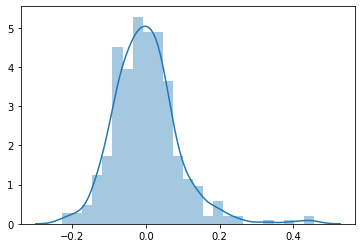

In [56]:
#residual y_train - y_train_predict
sns.distplot(y_train-y_train_predict)

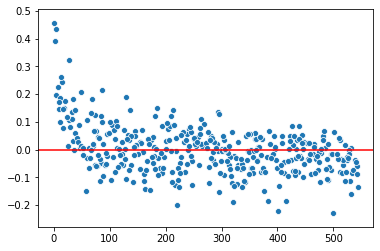

In [57]:
sns.scatterplot(y_train.index,y_train-y_train_predict)
plt.axhline(color='r')

## Prediction and Evaluation

In [58]:
test_df[num_var]=scaler.transform(test_df[num_var])

In [59]:
test_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [60]:
y_test=test_df.pop('price')
X_test=test_df

In [62]:
x_test_sm=sm.add_constant(X_test[['area','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','unfurnished']])

In [63]:
y_test_pred=lr_model.predict(x_test_sm)

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6713505684480789

In [66]:
lr_model.params

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

price = 0.0357 x const + 0.2347 x area + 0.1964 x bathrooms + 0.1177 x stories + 0.0487 x mainroad + 0.0301 x guestroom + 0.0239 x basement + 0.0864 x hotwaterheating + 0.0665 x airconditioning + 0.0628 x parking + 0.0596 x prefarea +(-0.0323) x unfurnished